## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## Informacion general del dataset: 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

## Importaciones de dependencias y librerias

In [27]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import seaborn as sns

In [28]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Cargado de dataset

Cargando el dataset desde el .csv del URL

In [29]:
# Load dataset
import io
url = ('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv')
dataset = pd.read_csv(url)
dataset.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

## Resumen del dataset

In [30]:
# Observar la forma del dataset
print(dataset.shape)

(150, 6)


In [31]:
# Describe the stats in general of the dataset

explore(dataset, method = 'summarize')

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
Id,int64,150,0,0.0,150,1,38.25,75.5,112.75,150,75.5,75.5,43.445368,0.0
PetalLengthCm,float64,150,0,0.0,43,1.0,1.6,4.35,5.1,6.9,3.758667,4.35,1.76442,-0.274464
PetalWidthCm,float64,150,0,0.0,22,0.1,0.3,1.3,1.8,2.5,1.198667,1.3,0.763161,-0.104997
SepalLengthCm,float64,150,0,0.0,35,4.3,5.1,5.8,6.4,7.9,5.843333,5.8,0.828066,0.314911
SepalWidthCm,float64,150,0,0.0,23,2.0,2.8,3.0,3.3,4.4,3.054,3.0,0.433594,0.334053
Species,object,150,0,0.0,3,Iris-setosa,-,-,-,Iris-virginica,-,-,-,-


## Limpieza de datos

In [32]:
# First, create a dataset backup
dataset_bak = dataset

In [33]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [34]:
# Estandarizacion de nombres de columna
dataset.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [35]:
# Distribucion por clase de flor
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualizacion de datos

### 5.1. Univariate Plots

Outlier Analysis - Boxplot


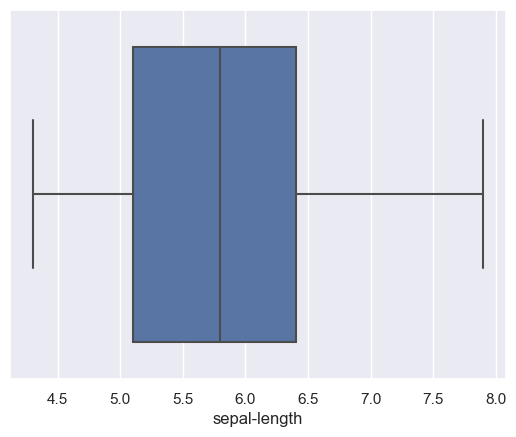

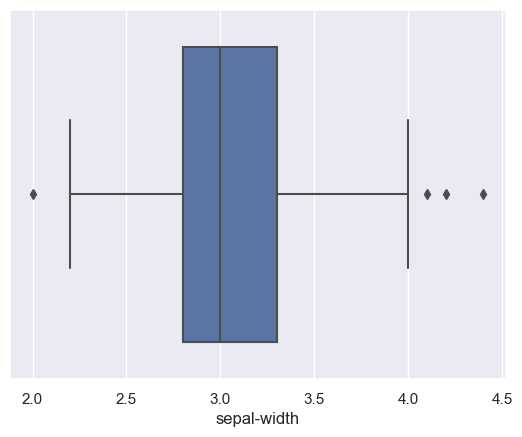

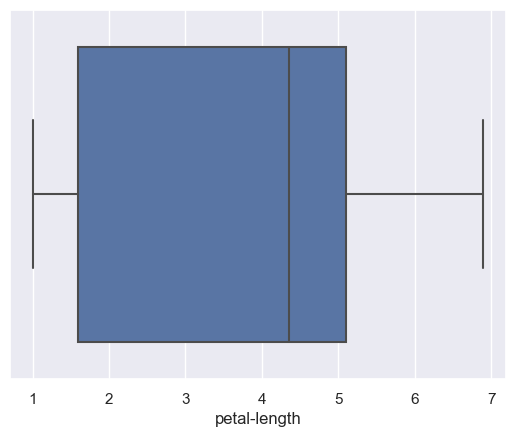

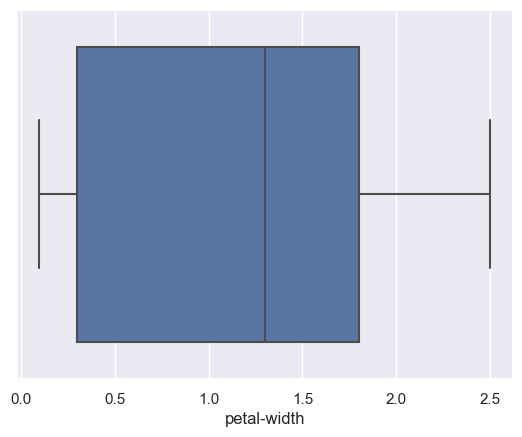

Distribution Analysis - Histogram


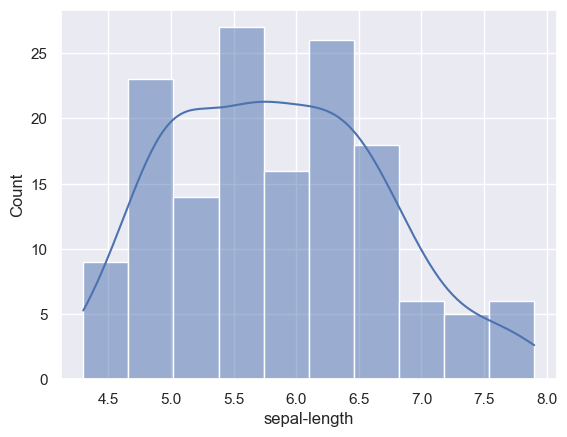

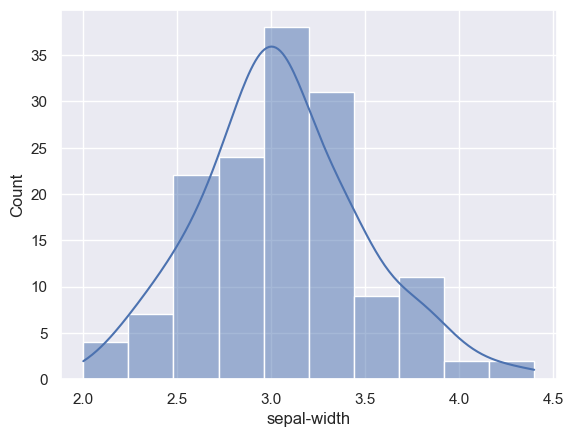

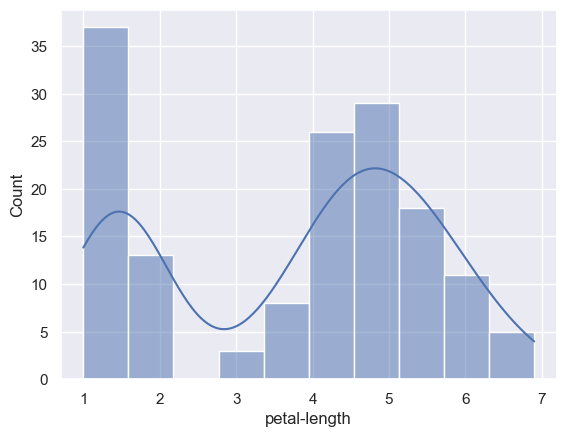

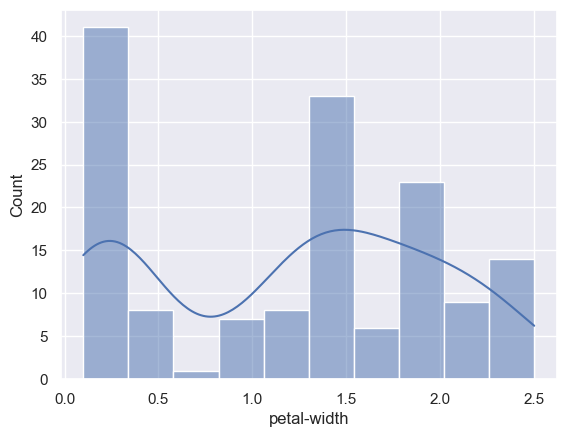

In [36]:
eda_num(dataset)

In [37]:
eda_num(dataset, method = 'correlation')

Correlation Analysis - Heatmap


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.00,-0.11,0.87,0.82
sepal-width,-0.11,1.00,-0.42,-0.36
petal-length,0.87,-0.42,1.00,0.96
petal-width,0.82,-0.36,0.96,1.00


Feature Importance in the prediction of species


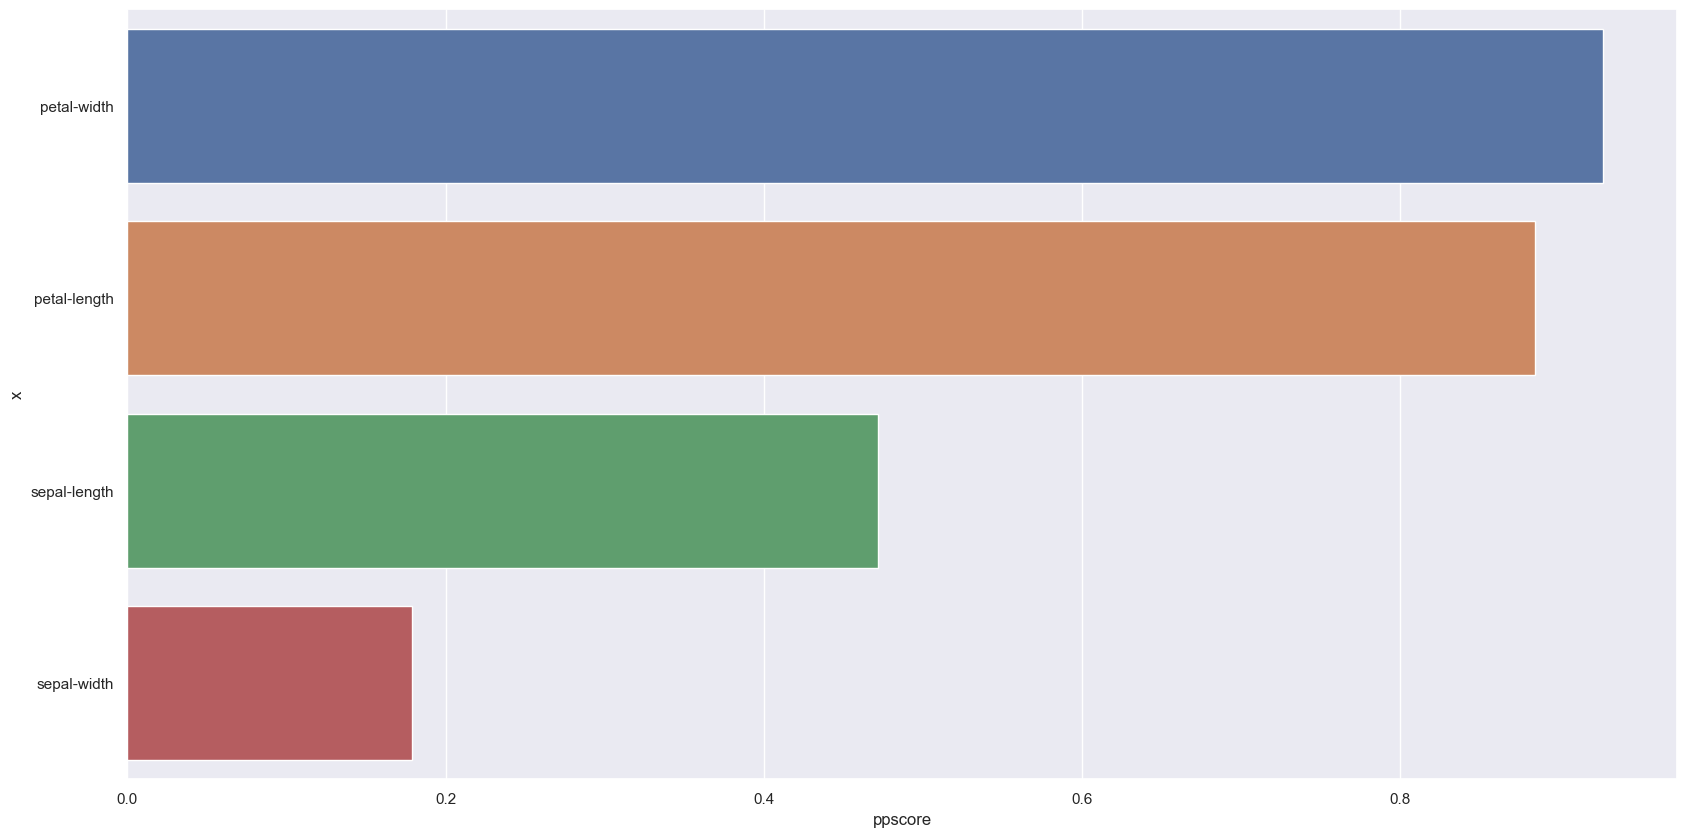

In [38]:
eda_numcat(dataset, x = 'species')

#### Comparison between the different species and the dimensions of their petals and sepals

<AxesSubplot: xlabel='species', ylabel='petal-width'>

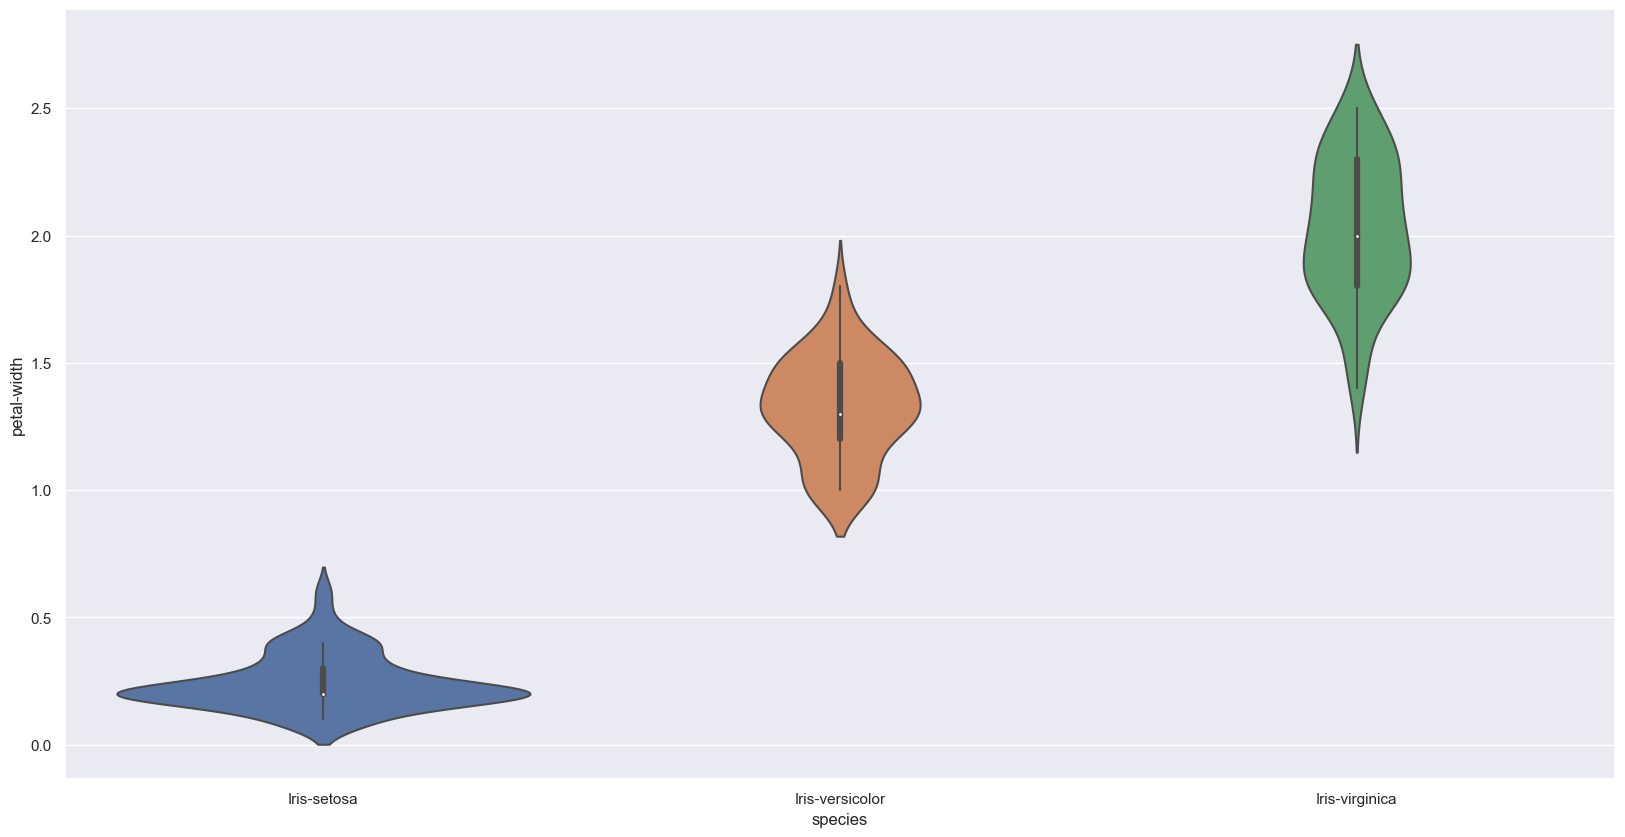

In [39]:
# Petal width

sns.violinplot(x = 'species', y = 'petal-width', data= dataset)

Aqui se puede observar como el ancho del petalo se diferencia bastante dependiendo de su especie, lo cual puede ser un elemento clave al momento de realizar una prediccion por medio de Machine Learning.

<AxesSubplot: xlabel='species', ylabel='petal-length'>

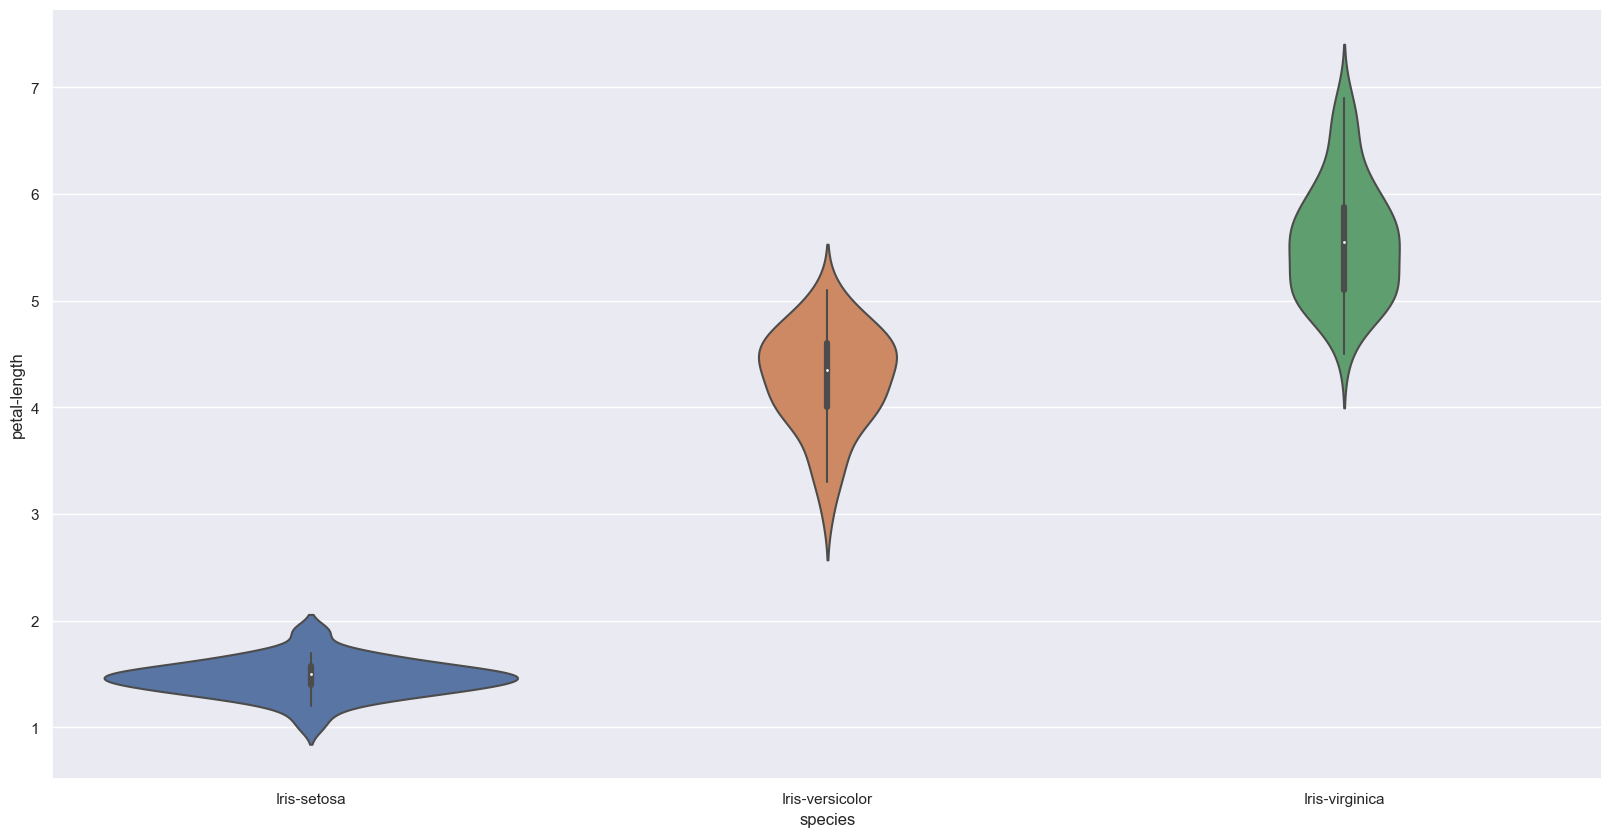

In [40]:
# Petal length
sns.violinplot(x = 'species', y = 'petal-length', data= dataset)

En el largo de los petalos, al igual que en las dimensiones obtenidas sobre el ancho de estos se puede ver una diferencia bastante marcada entre las diferentes especies de flor

<AxesSubplot: xlabel='species', ylabel='sepal-width'>

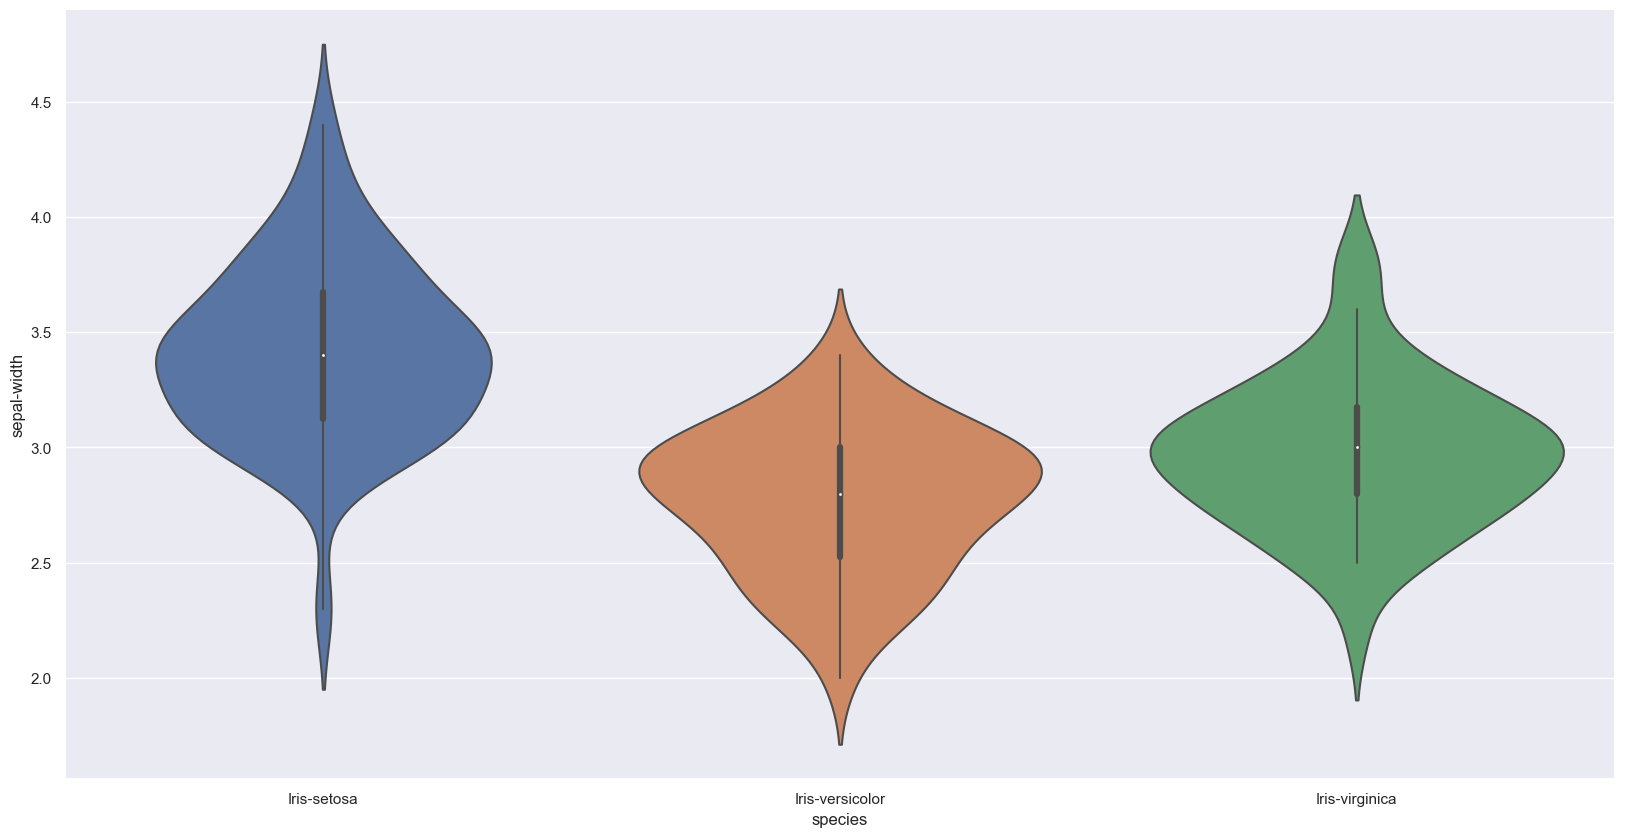

In [41]:
# Sepal width

sns.violinplot(x = 'species', y = 'sepal-width', data= dataset)

En el caso de los sepalos es un poco mas dificil diferenciar entre las especies basadas en el ancho de estos, debido a que cuentan con valores muy similares, aunque sin embargo los valores maximos y minimos de cada especie varian, por lo que esto puede resultar clave al momento de realizar la prediccion.

<AxesSubplot: xlabel='species', ylabel='sepal-length'>

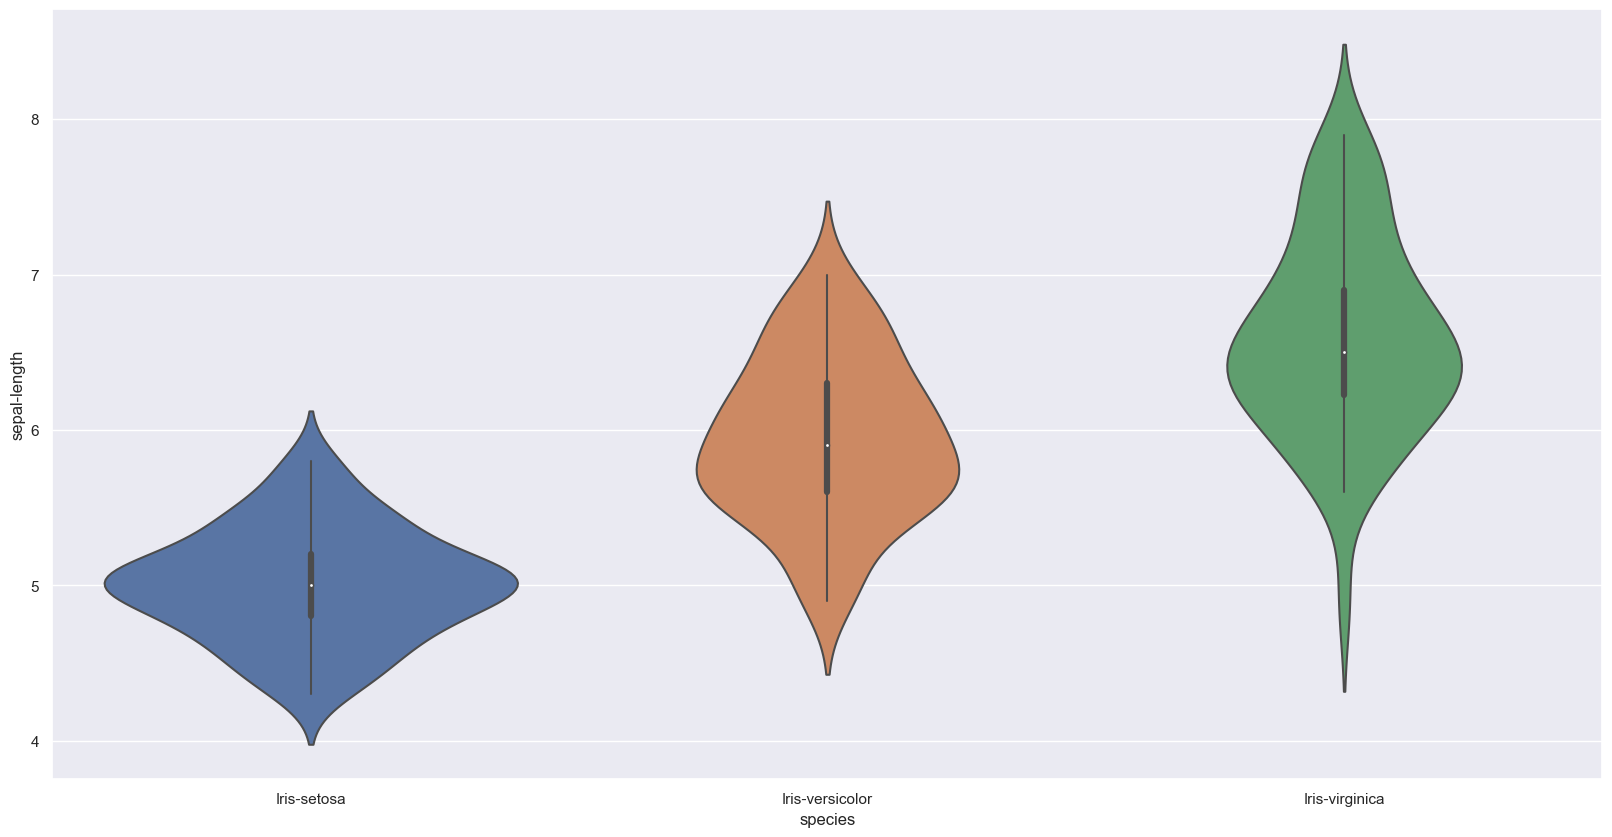

In [42]:
# Sepal length
sns.violinplot(x = 'species', y = 'sepal-length', data= dataset)

En el caso de la longitud de los sepalos se nota un poco mas la diferencia que en las dimensiones de ancho, sin embargo, aun hay algunos valores que se solapan unos sobre otros, pero los promedios, valores maximos y minimos son la clave para poder diferenciar cada una de las especies basadas en las dimensiones del sepalo

Como se puede observar, hay claras diferencias en las dimensiones de los petalos y sepalos de cada una de las especies, por lo que se pueden diferenciar facilmente debido a sus dimensiones. Esto nos puede ayudar al momento de realizar las predicciones basadas unicamente en las dimensiones ofrecidas, ya que como claramente hay una diferencia se puede llegar a ofrecer una prediccion mas acertada la mayoria del tiempo basado en las dimensiones dadas.

### Multiples variables comparadas

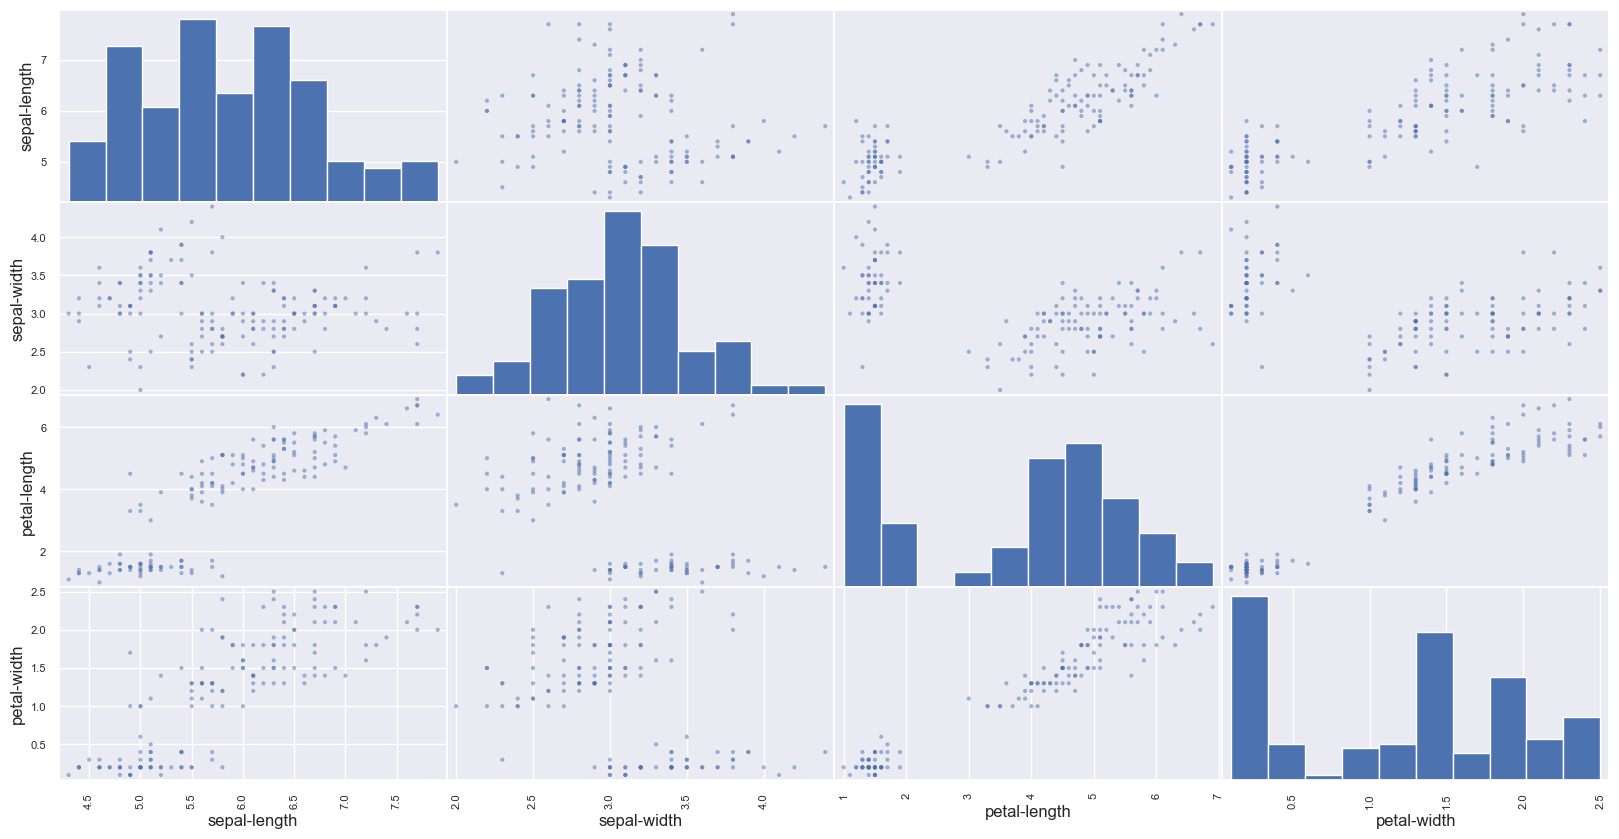

In [43]:
scatter_matrix(dataset)
plt.show()

## Evaluacion del algoritmo

### Dataset de validacion

In [44]:
# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Construccion de modelos

Se utilizaron los siguientes algorimos:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [45]:
# Definicion de modelos usados
models = {
	'LR': LogisticRegression(solver='liblinear', multi_class='ovr'),
	'LDA':LinearDiscriminantAnalysis(),
	'KNN': KNeighborsClassifier(),
	'CART': DecisionTreeClassifier(),
	'NB': GaussianNB(),
	'SVM': SVC(gamma='auto')

}

names = []
results = []
for name, model in models.items():
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	print(f'{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})')
	names.append(name)

LR: 0.942 (0.065)
LDA: 0.975 (0.038)
KNN: 0.958 (0.042)
CART: 0.933 (0.050)
NB: 0.950 (0.055)
SVM: 0.983 (0.033)


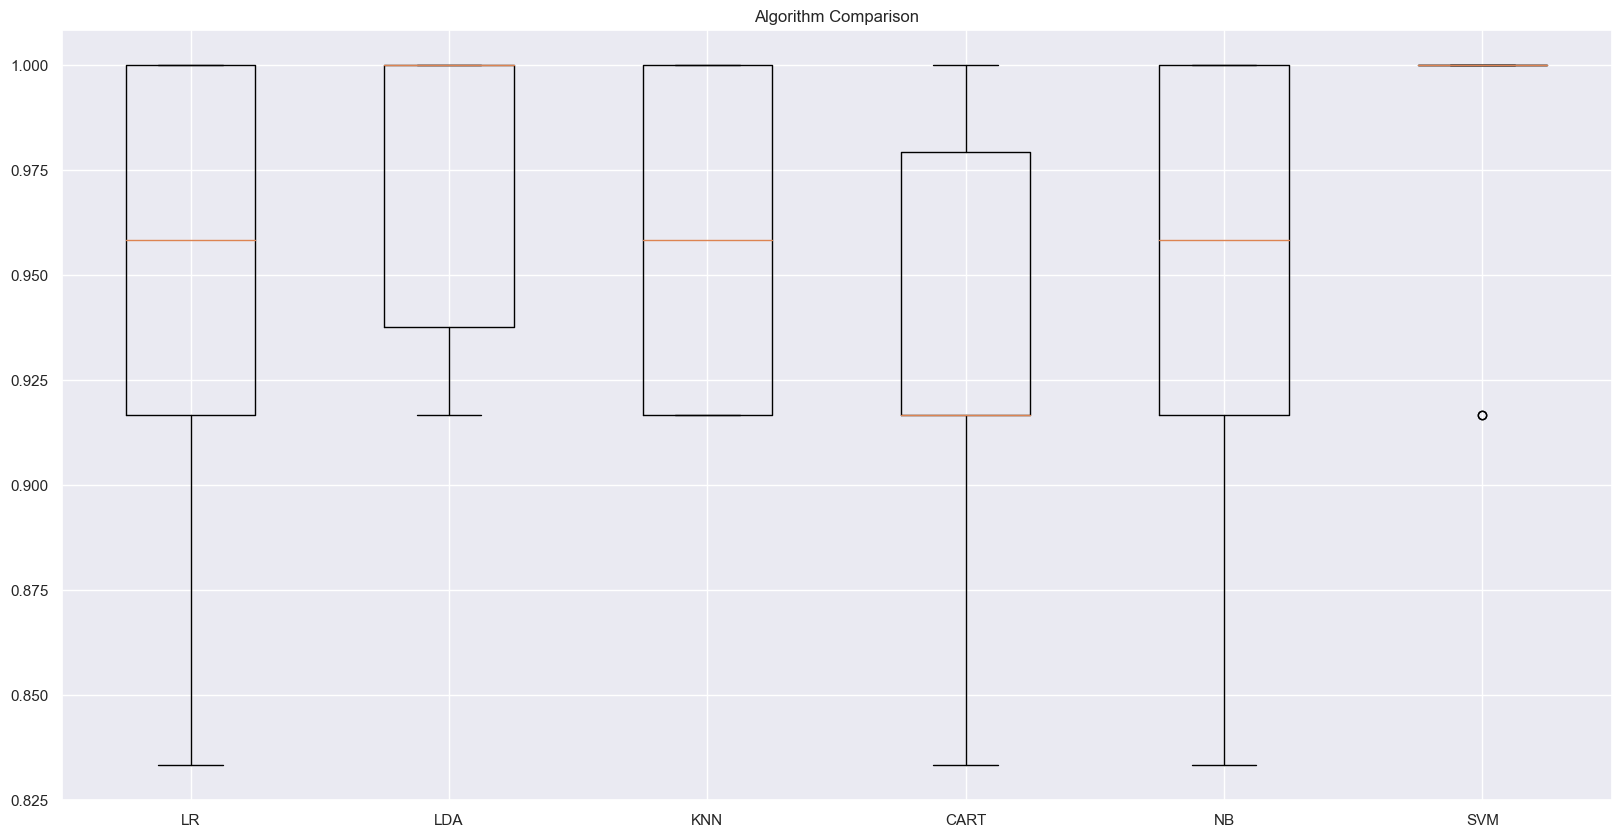

In [47]:
#Comparaciones de algoritmos
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Realizando predicciones

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_validation_norm = scaler.transform(X_validation)

# Reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_validation_pca = pca.transform(X_validation_norm)

# Using a smaller kernel
model = SVC(kernel='linear', C = 1, gamma='auto')

# Make predictions on validation dataset
model.fit(X_train_pca, Y_train)
predictions = model.predict(X_validation_pca)

In [49]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

